# Displacements due to pressure variations in reservoir simulating a Disk-shaped reservoir under uniform depletion by using 1) a set of Geertsma's nucleus of strain  model  2) Geertsma's cylinder and 3) Nagy's method with a set of prisms

This code aims at creating the synthetic simulating a Disk-shaped reservoir under uniform depletion


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import pickle


In [2]:
import compaction as cp
import nucleus_of_strain as ns
import geertsma as ge

In [3]:
# Parameters describing the reservoir

R = 500. #radius of the cylinder 
top = 750. #reservoir top
bottom = 750.5 #reservoir bottom
h = bottom - top #reservoir thickness

In [4]:
print('reservoir thickness:', h )

reservoir thickness: 0.5


In [5]:
# Define the model which consists of a disk-shaped reservoir 
# This model will be used by our methodology

model = cp.prism_layer_circular((0,0), R, (20,20), bottom, top)

In [6]:
# Geertsma’s nucleus of strain model  Equation 12.39 page 404 of the Book 
# Fjaer, E., et al., 2008. Petroleum Related Rock Mechanics, 2nd ed. Elsevier.

model_ns  = ns.nucleus_layer_circular((0,0), R, (1000,1000), bottom, top) 

In [7]:
# Define the model which consists of a disk-shaped reservoir (one cylinder)
# This model will be used Geertsma's (1973) method 
# Reference: Geertsma, J.: Land Subsidence above compacting oil and gas reservoirs, J. Pet. Tech. 25, 734-744, 1973.
model_ge  = cp.prism_layer_circular((0,0), R, (1,1), bottom, top) 

In [8]:
model_ns.shape

(785456, 3)

In [9]:
model.shape

(316, 6)

In [10]:
model_ge.shape

(1, 6)

In [11]:
# Pressure variation (in MPa)
DP    = np.zeros(len(model)) - 10.
DP_ns = np.zeros(len(model_ns)) - 10.
DP_ge = np.zeros(len(model_ge)) - 10.

In [12]:
print(np.shape(DP))
print(np.shape(DP_ns))
print(np.shape(DP_ge))

(316,)
(785456,)
(1,)


#### Young’s modulus $E$ and  Poisson's ratio $\nu$ 

In [13]:
# Young’s modulus (in MPa)
young = 3300

# Poisson coefficient
poisson = 0.25

### The uniaxial compaction coefficient $C_m$ 
$C_m = \frac{1}{E} \: \frac{(1 + \nu) (1  - 2\nu)}{(1-\nu)}$

In [14]:
cm = cp.Cm(poisson, young) # uniaxial compaction coefficient in 1/MPa
G = young/(2*(1+poisson)) # Shear Modulus in MPa
print ('CM', cm, 'G', G)

CM 0.0002525252525252525 G 1320.0


### Coordinates on the plane x = 0 m

In [15]:
# Define computation points on cross-sections at x  = 0
shape = (120, 24)
y = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])
y, z = np.meshgrid(y, z)
y = y.ravel()
z = z.ravel()
x = np.zeros_like(y)
coordinates = np.vstack([y, x, z])

In [16]:
coordinates.shape

(3, 2880)

### Compute the displacement components on plane x = 0 m¶

In [17]:
# Compute the x-component of displacement

d_x1, d_x2, d_xz2 = cp.d_field_x_component(coordinates, model, DP, poisson, young)

displacement_x = d_x1 + (3 - 4*poisson)*d_x2 + d_xz2

# Compute the y-component of displacement

d_y1, d_y2, d_yz2 = cp.d_field_y_component(coordinates, model, DP, poisson, young)

displacement_y = d_y1 + (3 - 4*poisson)*d_y2 + d_yz2

# Compute the z-component of displacement

d_z1, d_z2, d_zz2 = cp.d_field_z_component(coordinates, model, DP, poisson, young)

displacement_z = d_z1 - (3 - 4*poisson)*d_z2 + d_zz2

In [18]:
# horizontal component of displacement equation (39)
displacement_horizontal = np.sqrt(displacement_x**2 + displacement_y**2)

### Geertsma’s nucleus of strain model:  Compute the displacement  components on plane x = 0 m

In [19]:
# Compute the x-component of displacement

d_x1_ns, d_x2_ns, d_xz2_ns = ns.d_field_x_component_ns(coordinates, model_ns, DP_ns, poisson, young)

displacement_x_ns = d_x1_ns + (3 - 4*poisson)*d_x2_ns + d_xz2_ns

# Compute the y-component of displacement

d_y1_ns, d_y2_ns, d_yz2_ns = ns.d_field_y_component_ns(coordinates, model_ns, DP_ns, poisson, young)

displacement_y_ns = d_y1_ns + (3 - 4*poisson)*d_y2_ns + d_yz2_ns

# Compute the z-component of displacement

d_z1_ns, d_z2_ns, d_zz2_ns = ns.d_field_z_component_ns(coordinates, model_ns, DP_ns, poisson, young)

displacement_z_ns = d_z1_ns - (3 - 4*poisson)*d_z2_ns + d_zz2_ns



In [20]:
# horizontal component of displacement 
displacement_horizontal_ns = np.sqrt(displacement_x_ns**2 + displacement_y_ns**2)

In [21]:
# ur is the radial displacement and uz is the vertical displacement calculated by Geertsma's (1973) method 
ur, uz = ge.geertsma(coordinates, model_ge, DP_ge, cm, poisson, R, h)
#sr, st, sz = ge.geertsma_stress(coordinates, model_ge, DP, cm, poisson, R, h, G)

## PLOT DISPLACEMENT FIELD BY OUR METHODOLOGY: 

### Plot the results of the displacement fields on plane x = 0 m

In [22]:
y = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])

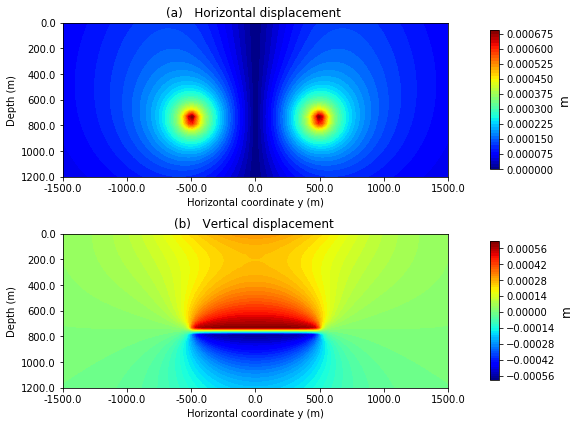

In [23]:
# Plot the displacement fields 
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, displacement_horizontal.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Horizontal displacement ")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, displacement_z.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b)   Vertical displacement ")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")
plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/Figure_Displacement.png', dpi=600)

# Plot the displacement fields by using Geertsma's (1973) nucleus of strain

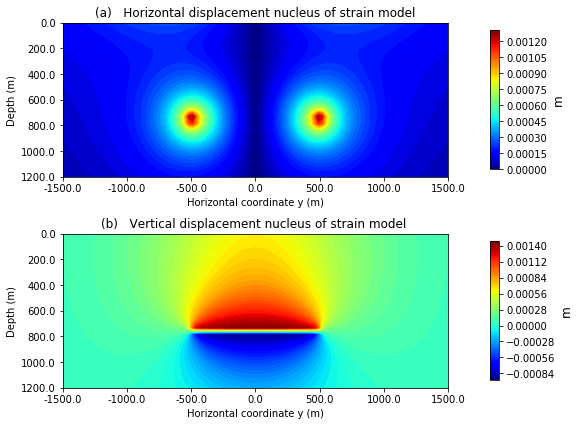

In [24]:
# Plot the displacement fields by using Geertsma's (1973) nucleus of strain
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, displacement_horizontal_ns.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Horizontal displacement nucleus of strain model")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, displacement_z_ns.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b)   Vertical displacement nucleus of strain model ")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")
plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/Figure_Displacement_Nucleus_Strain.png', dpi=600)

# Plot the displacement fields by using Geertsma's (1973) cylinder

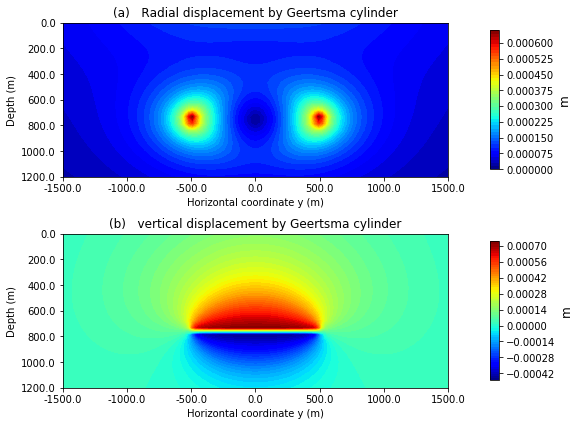

In [25]:
# Plot the displacement fields by Geertsma
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, ur.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Radial displacement by Geertsma cylinder")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, uz.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b)   vertical displacement by Geertsma cylinder")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")
plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/Figure_Displacement_Geertsma.png', dpi=600)

### Differences

In [26]:
#Difference Vertical Displacements Geertsma nucleus of strain and cylinder 
diff_ge = displacement_z_ns - uz

#Difference Vertical Displacement Nagy Geertsma nucleus 
diff_nagy_ns = displacement_z - displacement_z_ns 

diff_nagy_ge = displacement_z - uz


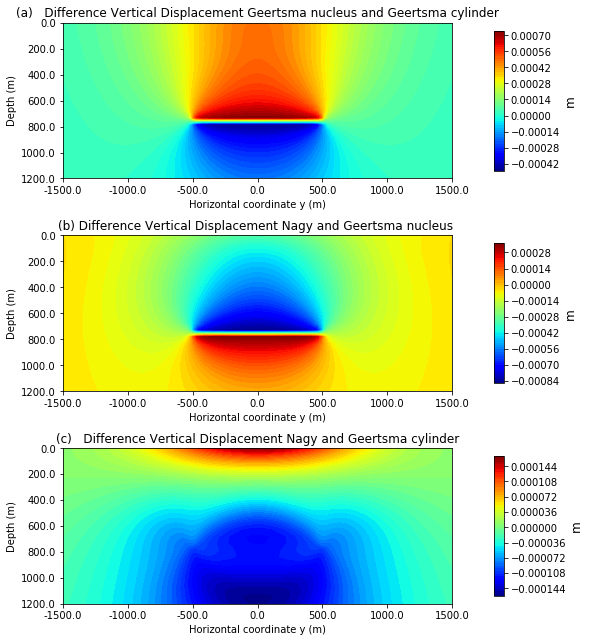

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=False, figsize=(12,9))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, diff_ge.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Difference Vertical Displacement Geertsma nucleus and Geertsma cylinder")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, diff_nagy_ns.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b) Difference Vertical Displacement Nagy and Geertsma nucleus ")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")

ax[2].set_aspect("equal")
img = ax[2].contourf(y, z, diff_nagy_ge.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[2], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[2].set_title("(c)   Difference Vertical Displacement Nagy and Geertsma cylinder")

ax[2].set_xticklabels(ax[2].get_xticks())
ax[2].set_yticklabels(ax[2].get_yticks())
ax[2].invert_yaxis()
ax[2].set_xlabel("Horizontal coordinate y (m)")
ax[2].set_ylabel("Depth (m)")

plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/Figure_Displacement_Geertsma.png', dpi=600)